Name: Umama Nasir Abbasi


Roll Number: 23100265

In [1]:
# Initialize and import
import otter
grader = otter.Notebook()
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression


# Instructions

## Assignment instructions

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.

## Submission instructions

* You must submit a zip file containg just this notebook (replace XXXXXXXX with your roll number)
* The name of the zip file must be your `Roll Number`

## Dataset
In 2018, Facebook published full-page ads in newspapers in several countries to provide its users tips for spotting fake news. 

![ad](ad.png)

As a researcher, it is important to know whether these tips had any effect in improving individuals’ ability to spot fake news. You can find the full paper [here](https://doi.org/10.1073/pnas.1920498117). It is not required for this assignment to read the paper, but it's a fun read anyway :)

This experiment was conducted to find the effect of media literacy intervention on combatting fake news in the US and India. For this assignment, we will focus on the interventions in India, and how effective they were. Each row represents an individual.

**Note:** For the sake of this assignment, we have extracted a smaller subset of the data, which is what we will be using.

In [2]:
# Import dataset
df = pd.read_csv("fake_news.csv", index_col=0).reset_index(drop=True)
df

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,...,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30763,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30764,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30765,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
30766,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0


## Data summary

Each row in this dataset represents an individual that was shown true and fake news items. They were asked to classify them into true or fake news. Some of these individuals were shown the ad shown above. We are interested to see whether media literacy intervention in the form of the tips in the ad had any effect on the accuracy of their classifications. 
- **Treatment**: The treatment variable is 1.0 if the individual was shown the ad, and 0.0 if not (control).
- **Outcome**: The outcome variable we are interested in is the average accuracy accross different measures of accuracy. This is measured on a scale from 1.0 to 4.0.

In addition to these, several attributes of the individuals are stored in this dataset:

- **low_caste**: 1.0 if the individual belongs to a 'low caste'
- **college**: 1.0 if the individual has been to/is going to college
- **hindu**: 1.0 if the individual identifies as a Hindu
- **muslim**: 1.0 if the individual identifies as a Muslim
- **male**: 1.0 if the individual is male. 0.0 if the individual is non-male
- **vote_intention**: On a scale from 1 to 3, indicates how strongly the individual wants to vote.
- **whatsapp**: 1.0 if the individual uses Whatsapp
- **days_whatsapp**: Indicates how many days of the week the individual uses Whatsapp.
- **bjp_support**: 1.0 if the individual supports the BJP.
- **bjp_oppose**: 1.0 if the individual opposes the BJP.
- **agegroup**: Indicates age groups according to the following key: 1.0: Age 18−29, 2.0: Age 30−44, 3.0: Age 45−59, 4.0: Age 60+
- **nationalistic**: 1.0 if the individual considers themself nationalistic
- **uncongenial**: 1.0 if the news shown to them was uncongenial.
- **political_knowledge**: Assesses the individual's political knowledge on a scale from 0.0 to 4.0.

## Data cleaning

**Question 1:** There are currently 10 columns for measuring accuracy. Combine them into one column by averaging the accuracy results for each row, and storing them in a new column called `accuracy`.

Note: Make sure to drop the other accuracy columns as well. 

In [3]:
# Code here #
df['accuracy'] = df.loc[:, 'accuracy1': 'accuracy10'].mean(axis=1)
df =df.drop( df.loc[:, 'accuracy1': 'accuracy10'], axis=1)
df.head(5)

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,days_whatsapp,bjp_support,bjp_oppose,agegroup,nationalistic,uncongenial,political_knowledge,accuracy
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,1.0,0.0,2.0,2.6


In [4]:
grader.check("q1")

results: All test cases passed!

**Question 2**: `caseid` and `ResponseId` are unimportant to us. Drop these columns.

In [5]:
# Code here #
df = df.drop(['caseid', 'ResponseId'], axis=1)
df.head(5)


,male,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,days_whatsapp,bjp_support,bjp_oppose,agegroup,nationalistic,uncongenial,political_knowledge,accuracy
0,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
1,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,1.0,2.0,2.6
2,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
3,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,0.0,0.0,2.0,2.6
4,1.0,1,1.0,0.0,1.0,0.0,3.0,1.0,7.0,0.0,1.0,1.0,1.0,0.0,2.0,2.6


In [6]:
grader.check("q2")

results: All test cases passed!

## Exploratory Data Analysis

We are curious to see how different groups react to the treatment (literacy intervention). The `treatment` variable is 1.0 if the individual has been given an intervention.

**Question 3:** 

a) Complete the function given. Given a column name and dataframe, `treatment_plot` should plot the average treatment effect for **all** groups of that column variable.  *For reference, refer to q3.png, which is what should be output if you input 'male' (you can have minor differences like colors, but the axis should be the same).*

b) What do you observe in your treatment plot for the column `male`? Write your answer as a comment.

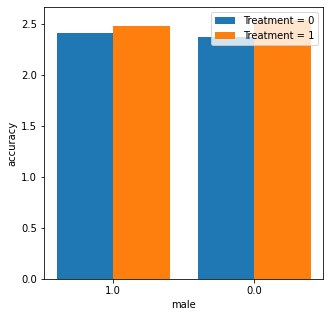

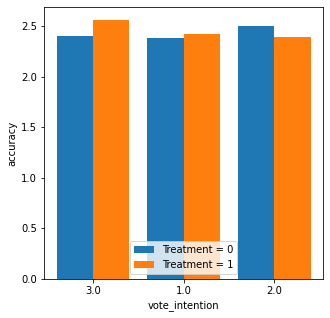

In [7]:
def treatment_plot(data, col):
    # Code here #
    treat = []
    untreat = []
    df = data
    unique = df[col].unique() #unique values in that column
    for i in range(len(unique)):
        val = df[df[col] == unique[i]]
        treated = val[val['treatment'] == 1].loc[:,'accuracy'].mean(axis=0) 
        untreated = val[val['treatment']  == 0].loc[:,'accuracy'].mean(axis=0)
        treat.append(treated)
        untreat.append(untreated)
# plots

    plt.figure(figsize=(5,5)) 
    x = [i for i in unique] 
    xAxis = np.arange(len(x))
    plt.bar(xAxis-0.2, untreat, 0.4, label = 'Treatment = 0')
    plt.bar(xAxis+0.2,treat,0.4, label = 'Treatment = 1')
    plt.xticks(xAxis, x)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('accuracy')
    plt.show()
    

treatment_plot(df, 'male')
treatment_plot(df, 'vote_intention')


# b- For male = 1, the treatment group has a higher accuracy than the control group. For male = 0, the treatment still has a higher accuracy than control however the ATE for male = 0 is 
# relatively less. 


**Question 4:** 

a) Plot a correlation heatmap for this dataset (it should be a color coded graph indicating correlation values for each of the columns against every other column).

b) Comment on any three notable correlations. For each of these pairs, answer the following questions: Are they causally related? If so, is their causal relationship direct or indirect? Name any confounding variables you suspect. If you do not think they are causally related, comment why.

Note: You will be graded on how critically you have commented, not how much you write. So keep your answers crisp and to the point, but also think deeply.

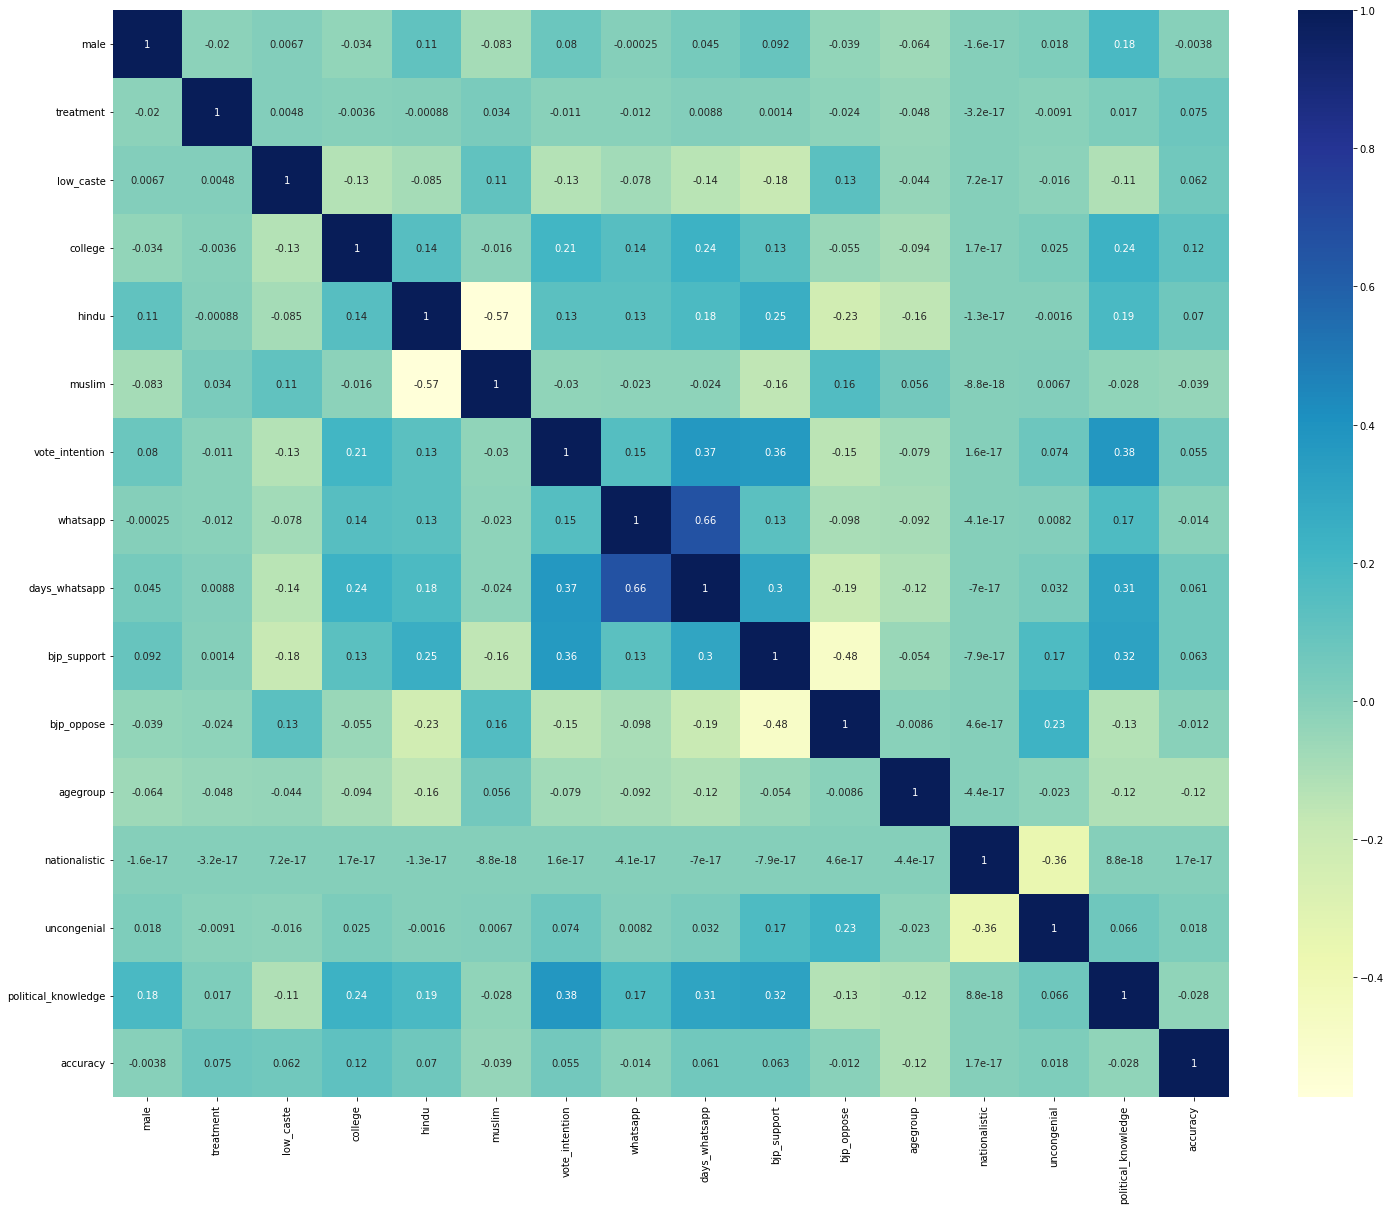

In [8]:
# Code here #
plt.figure(figsize=(25,20))
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()



In [9]:
#b- 
#Although correlation does not necessarily lead to causation, it can imply some form of causation. If two values are highly correlated, that means one might be causing the other.

# whatsapp + days_whatsapp are significantly correlated (0.66) meaning if the person has whatsapp, they will use it for most of the days. A confounding variable can be that users only use whatsapp
# for calls or maybe to run a business. This is directly related. 

# days_whatsapp and vote intention is also correlation with each other, the co-effecient = 0.37. There might be other factors, such as how much TV a person watches or the economic conditions of
# their neighbourhood that affect their intention to vote. This is not directly related. 

# political_knowlege and vote_intention are also correlation with a co-effecient value of 0.38. Again there can be confounding variables such as peer pressue to vote or community pressure 
# to cast (or not cast) a vote which is not considered. It is directly related. 



## More on treatment effect

**Question 5:** 

a) Find the overall average treatment effect of media literacy intervention. Store it in the variable `true_ATE`.
Note: Your test case may pass even if your value has the wrong sign.

b) Is your result positive or negative? What do the sign (+ve or -ve) and magnitude of your result tell you about the media intervention? Write your answer as a comment.

In [10]:
# Code here #
treated = df[df['treatment'] == 1].loc[:,'accuracy'].mean(axis=0) 
untreated = df[df['treatment']  == 0].loc[:,'accuracy'].mean(axis=0)
true_ATE = treated  - untreated
print(true_ATE)

# b- The overall sign is positive. This means that for people who received the media literacy intervention, there was an increase in the accuracy score by 0.102. We can thus conclude that 
#    media literacy intervention has an overall positive affect on classifying fake news. 

0.10177539759818277


In [11]:
grader.check("q5")

results: All test cases passed!

**Question 6**: 

a) Plot a histogram of the accuracies of those who did not receive the treatment. Overlay this graph with a histogram of the accuracies of those who did receive treatment.

b) What do you observe in this plot? What does this tell you about the treatment? Write your answer as a comment.

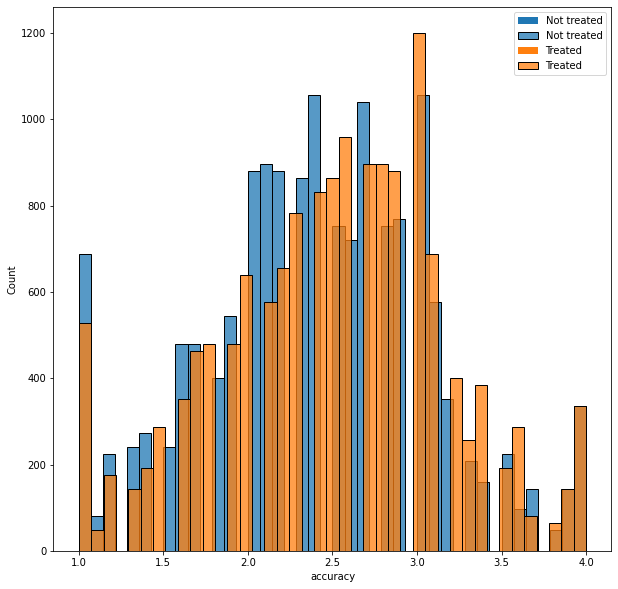

In [12]:
# Code here # 

dataFrame = df.loc[:, 'low_caste': 'political_knowledge']
columnName = dataFrame.columns.tolist()
notTreated = df[df['treatment'] == 0]
treated = df[df['treatment'] == 1]

# histogram of not treated. 
plt.figure(figsize=(10,10))
sns.histplot(data = notTreated, x='accuracy', label = 'Not treated' )
sns.histplot(data = treated, x = 'accuracy',label = 'Treated')
plt.legend()
plt.show() 


# b- More people from the treatment group have a higher accuracy range as compared to those from the contorl group. Near to high accuracy score on the x axis, the counts for treatment 
# increases whereas around the low accuracy scores, counts for not treated is observably higher. 

**Question 7:** 

a) Calculate the p-value for the treatment and store it in `p_value`. 

b) Comment on the statistical significance of your result. Should you reject the null hypothesis?

Note: You are allowed to use scipy for calculating the p-value.

In [13]:
# Code here # 
treatment = df[df['treatment'] == 1].loc[:, 'accuracy']
notTreatment = df[df['treatment'] == 0].loc[:, 'accuracy']
res = ttest_ind(treatment, notTreatment)
p_value = res[1]
print(p_value)

# b- The value of p is very less than the accepted thereshold of 0.05 (5%). This means that the value is statistically significant. Thus we reject the null hypothesis. 

2.204248740780305e-39


In [14]:
grader.check("q7")

results: All test cases passed!

We now introduce a biased sample of our dataset.

In [15]:
bias_df = pd.read_csv("fake_news_bias.csv", index_col=0).reset_index(drop=True)
bias_df

,male,caseid,ResponseId,treatment,low_caste,college,hindu,muslim,vote_intention,whatsapp,...,accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7,accuracy8,accuracy9,accuracy10
0,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
1,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
2,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
3,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
4,1.0,16778_aadbwrvbgqtljlhn_83,R_1cZYHBsrtkJ02O7,1,1.0,0.0,1.0,0.0,3.0,1.0,...,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22562,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22563,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22564,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0
22565,1.0,AZYAI0UH6K6KN,R_yR7X3S994IGFDPj,1,0.0,1.0,1.0,0.0,1.0,1.0,...,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0


**Question 8:** 

a) Clean this data as you did for the previous dataset.

b) Plot average treatment plots for all groups of each of the columns of `bias_df` (except the column `accuracy`). Hint: Use a loop and the function you made earlier.

In [16]:
# Code here #
# part a: Data cleaning
bias_df['accuracy'] = bias_df.loc[:, 'accuracy1': 'accuracy10'].mean(axis=1)
bias_df =bias_df.drop( bias_df.loc[:, 'accuracy1': 'accuracy10'], axis=1)
bias_df= bias_df.drop(['caseid', 'ResponseId'], axis=1)
# bias_df.head(5)



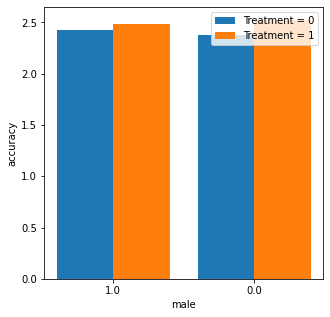

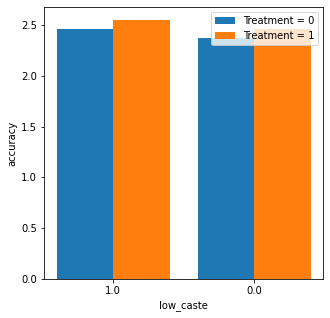

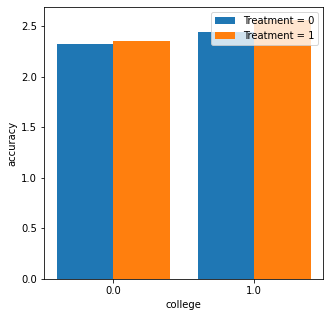

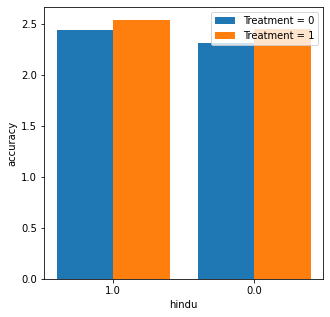

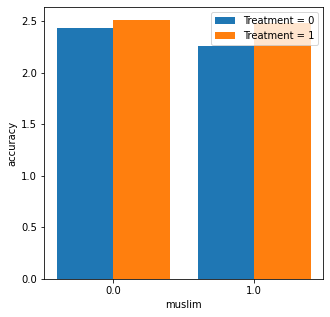

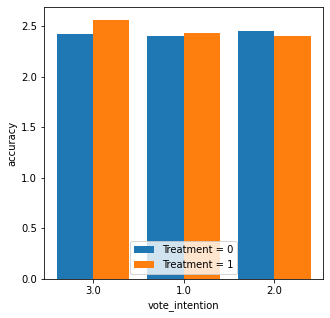

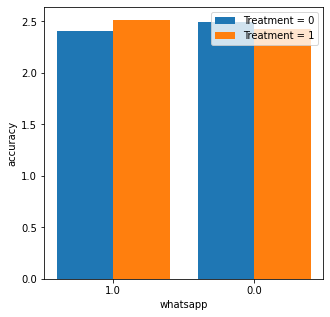

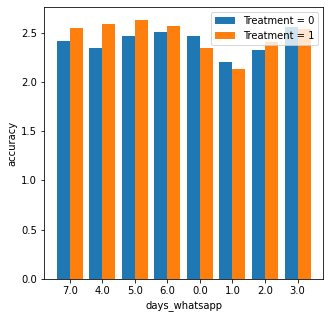

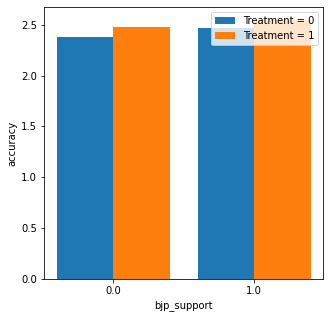

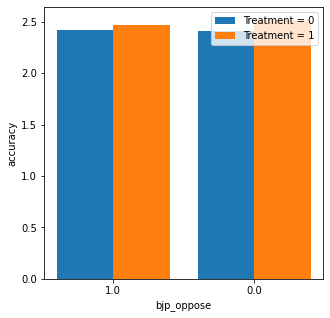

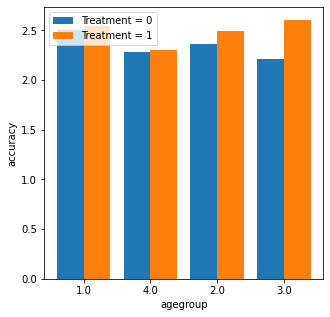

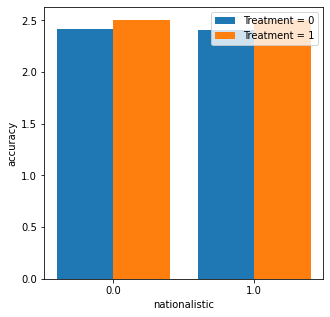

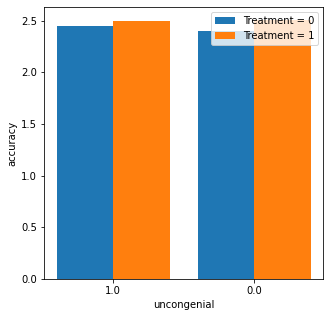

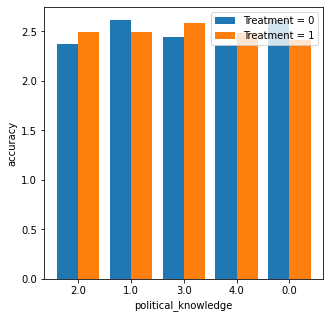

In [18]:
# part b: Plot average treatment plots. 
columnName = bias_df.columns.tolist()
columnName.pop()
columnName.remove('treatment')

for  i in columnName:
    treatment_plot(bias_df, i)

**Question 9:** Find the average treatment effect for this dataset and store it in `bias_ATE`.

In [19]:
# Code here # 
treated = bias_df[bias_df['treatment'] == 1].loc[:,'accuracy'].mean(axis=0) 
untreated = bias_df[bias_df['treatment']  == 0].loc[:,'accuracy'].mean(axis=0)
bias_ATE = treated  - untreated
print(bias_ATE)

0.09040268776837257


In [20]:
grader.check("q9")

results: All test cases passed!

**Question 10**: Store the selection bias in this dataset in the variable `selection_bias`. Hint: Refer to the lecture slides.

In [23]:
# Code here #
selection_bias = bias_ATE - true_ATE
print(selection_bias)

-0.011372709829810201


In [22]:
grader.check("q10")

results: All test cases passed!

We now want to remove this selection bias by conditioning on our dataset. 

**Question 11:** Condition on the `bias_df` to see if you can reduce the absolute selection bias. Store your final selection bias in the variable `conditioned_selection_bias`. **You must condition on two variables, minimum**. This question will likely require trial and error.

Note: There are several ways to tackle this question. We recommend you use `np.sample` with a constant seed value  (random_state) to maintain reproducability. If you use this method, **you are not allowed to create a sample smaller than 2000 datapoints in total**. 

In [38]:
conditioned_df = bias_df.copy()
treatment1 = conditioned_df[ (conditioned_df['treatment'] == 1 ) & (conditioned_df['college'] == 1) & (conditioned_df['male'] == 1) & (conditioned_df['low_caste'] == 1)].loc[:,'accuracy'].mean(axis=0)
treatment0 = conditioned_df[ (conditioned_df['treatment'] == 0 ) & (conditioned_df['college'] == 1) & (conditioned_df['male'] == 1) & (conditioned_df['low_caste'] == 1)].loc[:,'accuracy'].mean(axis=0)
biased_ATE = treatment1 - treatment0
conditioned_selection_bias = biased_ATE - true_ATE
print(conditioned_selection_bias)

-0.004324476787668452


In [39]:
grader.check("q11")

results: All test cases passed!